# CPN Task 6

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve, curve_fit
from matplotlib import pyplot as plt
import matplotlib.pyplot
import pandas as pd
from scipy.integrate import solve_ivp

#import scienceplots
#plt.style.use(['science','notebook','grid'])


The model will be evaluated from time = 0 seconds to time = t_end

In [2]:
t_end=400

Below are the parameters for the step change in pressure applied to the valve

In [3]:
pressure_initial=9  #psi
step_magnitude=2 #psi
time_change=50

time=np.linspace(0,t_end,10000)
psi=6894.757 #Pascal

In [4]:
liszt=[]
for i in time:
    if i<time_change:
        ans=pressure_initial
    else:
        ans=(pressure_initial+step_magnitude)
    liszt.append(ans)
   

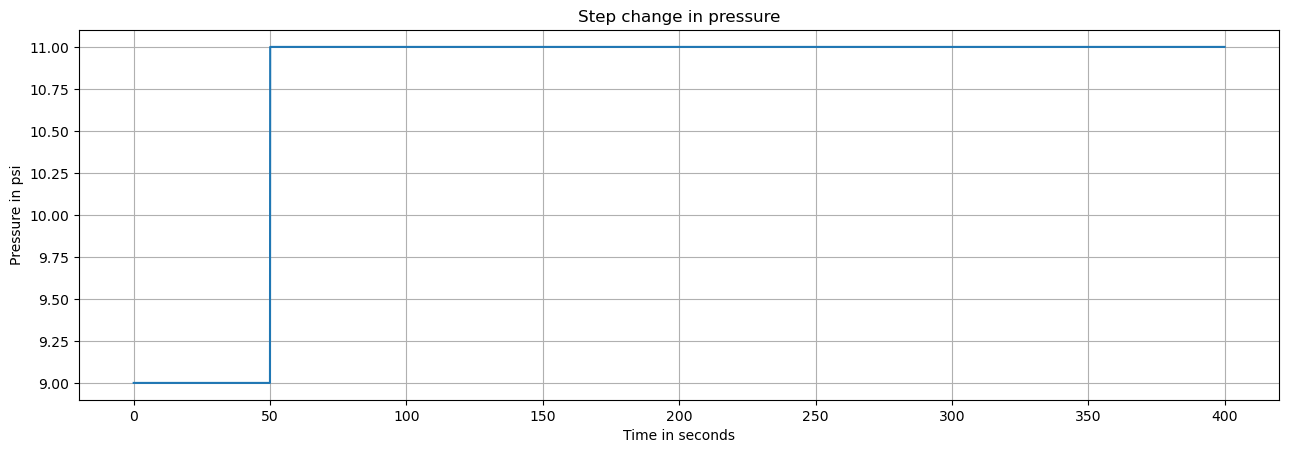

In [5]:
plt.plot(time,liszt)
plt.xlabel('Time in seconds')
plt.ylabel('Pressure in psi')
plt.title('Step change in pressure')
plt.subplots_adjust(right=2)
plt.grid(True)
plt.show()

Below are the parameters of the sytem.

In [6]:
M_in=11.1111 #kg/s
Kp=1/12
tau=10
zeta=3
x_initial=Kp*pressure_initial
delP= 2 #psi
fx=np.sqrt(x_initial)
F_valve=1.26032 #m3/s
D=M_in/F_valve
SG=D/1000
Cv=F_valve/(fx*np.sqrt(delP/SG))

In [7]:
print(SG)

0.00881609432525073


Solve for x and flowrate as a function of time

In [8]:
#Initial values
x=x_initial
y=0

xs=[x]
ys=[y]
Flows=[F_valve]

In [9]:
dt=time[1]-time[0]
for i in  np.arange(0,len(time)-1,1):
    
    #Slopes
    dxdt=y
    dydt=-2*zeta/tau*y-x/tau**2+Kp*liszt[i]/tau**2
    
    #Integration
    x=x+dxdt*dt
    y=y+dydt*dt
    Flow=Cv*np.sqrt(x)*np.sqrt(delP/SG)
    
    xs.append(x)
    ys.append(y)
    Flows.append(Flow)

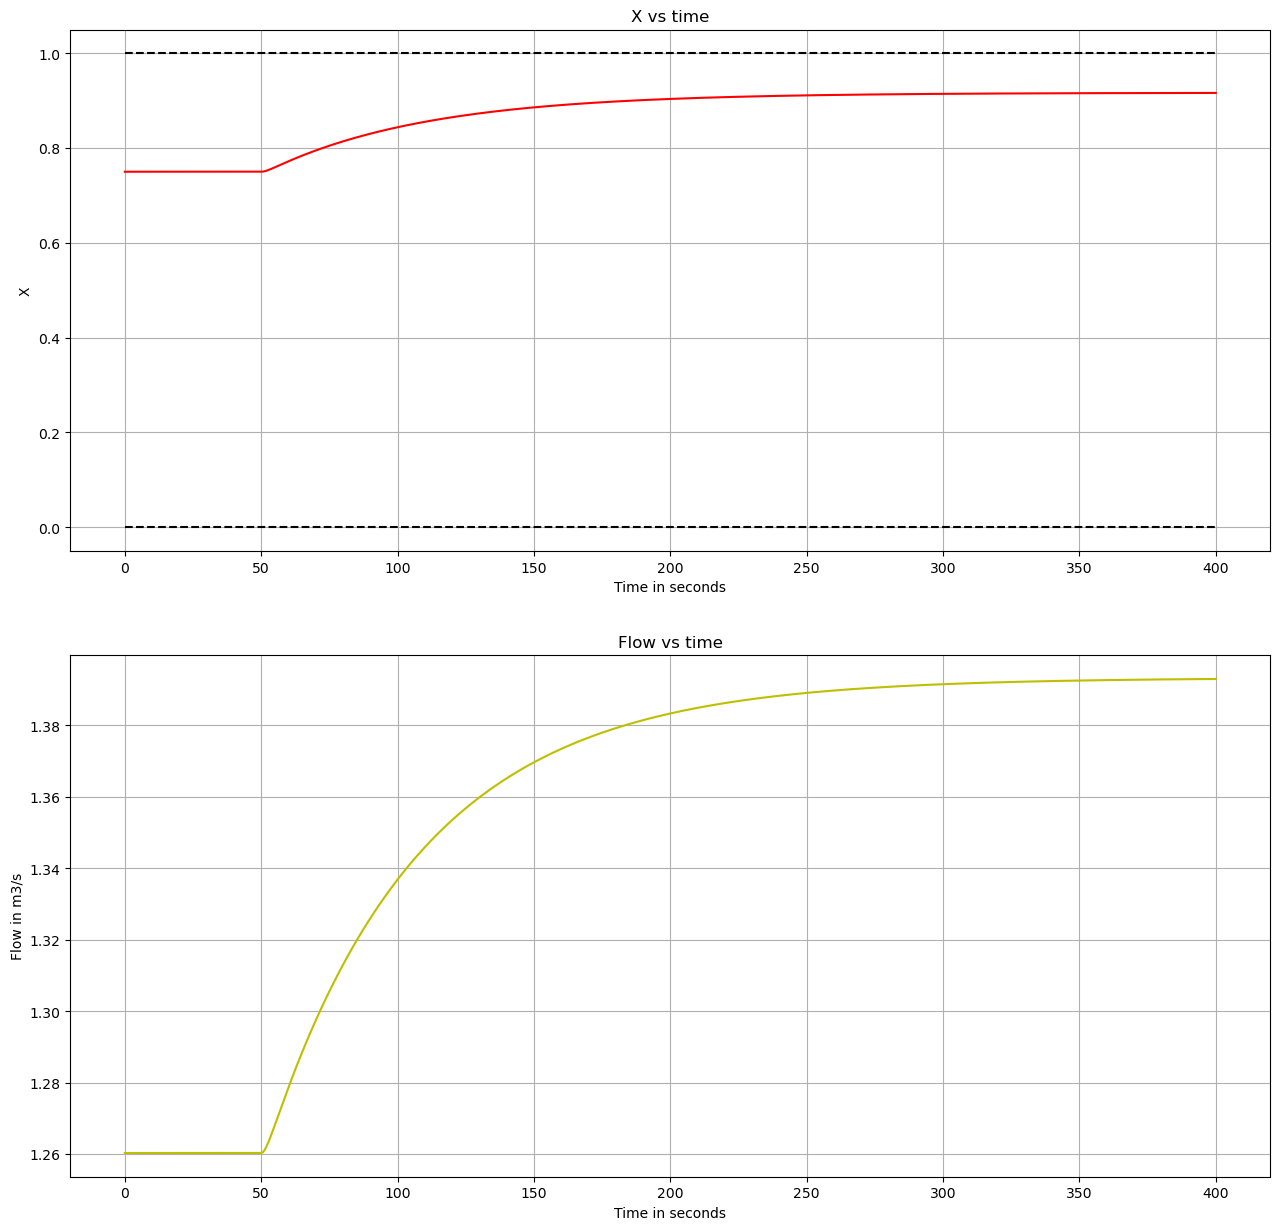

In [10]:
plt.subplot(2,1,1)
plt.plot(time,xs,'r')
plt.plot([0,t_end],[1,1],'k--')
plt.plot([0,t_end],[0,0],'k--')
plt.grid(True)
plt.xlabel('Time in seconds')
plt.ylabel('X')
plt.title('X vs time')

plt.subplot(2,1,2)
plt.plot(time,Flows,'y')
plt.xlabel('Time in seconds')
plt.ylabel('Flow in m3/s')
plt.title('Flow vs time')
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2.5)
plt.grid(True)
plt.show()


The cells below will test the solutions above by comparing Eulers method with ODE int on the same graphs. The graphs must fit perfectly on top of each other.


In [11]:
def pressure(t,array):
    count=-1
    for i in time:
        if i<=t:
            count=count+1
    return array[count]        
           

def checker1(var,t):
    x,y=var
    dxdt=y
    dydt=-2*zeta/tau*y-x/tau**2+Kp*pressure(t,liszt)/tau**2
    return dxdt,dydt


x_check, y_check = odeint(checker1,[x_initial,0],time).T
flow_check = Cv*np.sqrt(x_check)*np.sqrt(delP/SG)

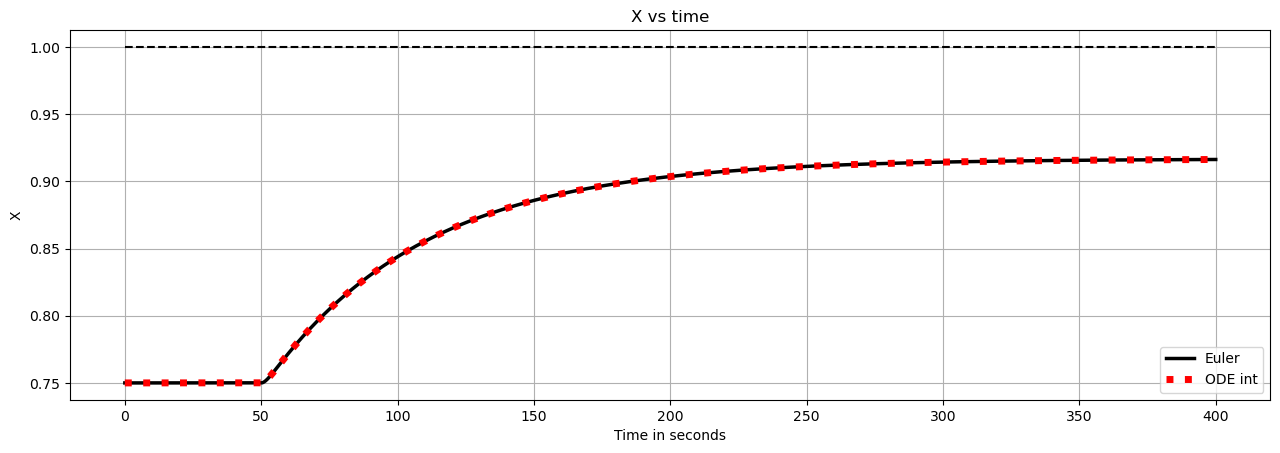

In [12]:
#Check x
plt.plot(time,xs,'k',label='Euler',linewidth=2.5)
plt.plot(time,x_check,'r:',label='ODE int',linewidth=5)
plt.plot([0,t_end],[1,1],'k--')
#plt.plot([0,t_end],[0,0],'k--')
plt.xlabel('Time in seconds')
plt.ylabel('X')
plt.title('X vs time')
plt.legend(loc='best')
plt.subplots_adjust(right=2)
plt.grid(True)
plt.show()




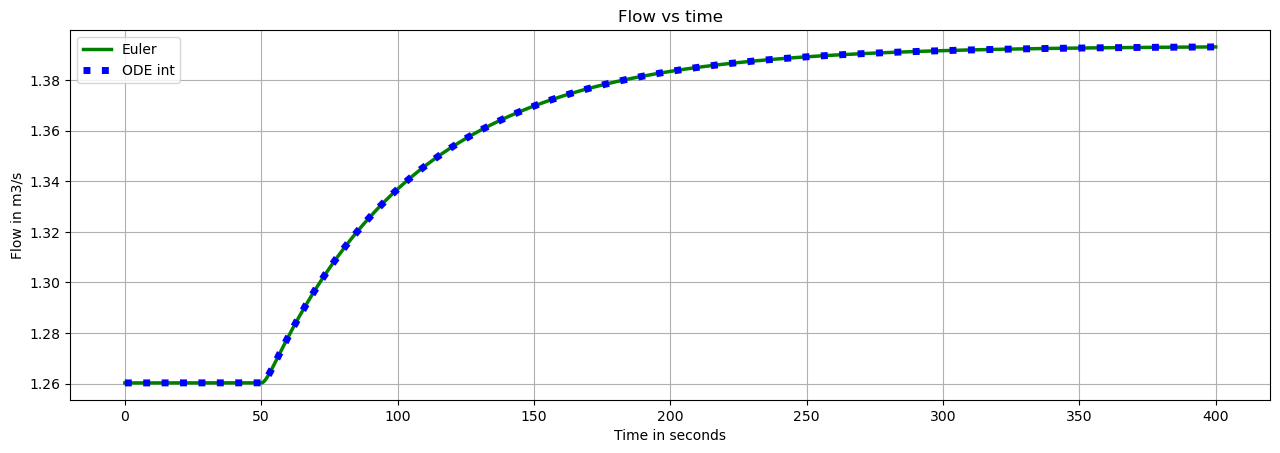

1.3930149145053083


In [13]:
#Check the flows
plt.plot(time,Flows,'g',label='Euler',linewidth=2.5)
plt.plot(time,flow_check,'b:',label='ODE int',linewidth=5)
plt.xlabel('Time in seconds')
plt.ylabel('Flow in m3/s')
plt.title('Flow vs time')
plt.legend(loc='best')
plt.subplots_adjust(right=2)
plt.grid(True)
plt.show()

print(Flows[-1])

Solve for concentration as a function of time.

In [14]:
#Parameters of the reactor and reaction
V=1
k0=0.0001
Ea=60000
R=8.314
T=1140 #K
P=1*10**7 #Pa
k=k0*np.exp(-Ea/(R*T))
#Volumetric flowrate into reactor
F=1.26 #m3/s

#Molar flowrate of species into reactor
n_N2_in=326.211 #moles
n_H2_in=978.64 #moles
n_NH3_in=0

#Concentration of species into reator
C_N2_in=n_N2_in/F  #mol/m3
C_H2_in=n_H2_in/F
C_NH3_in=n_NH3_in/F

#Initial concentration inside reactor
def steadyState(var):
    C_N2,C_H2,C_NH3=var
    dC_N2dt=F/V*(C_N2_in-C_N2)-k*C_N2*C_H2**3
    dC_H2dt=F/V*(C_H2_in-C_H2)-3*k*C_N2*C_H2**3
    dC_NH3dt=F/V*(C_NH3_in-C_NH3)+2*k*C_N2*C_H2**3
    
    return dC_N2dt,dC_H2dt,dC_NH3dt

C_N2_0, C_H2_0, C_NH3_0 = fsolve(steadyState,[C_N2_in/2,C_H2_in/2,C_H2_in/2])

print('Below are the initial steady state values before the step change:')
print()
print('C_N2  = {} mole/m3'.format(C_N2_0))
print('C_H2  = {} mole/m3'.format(C_H2_0))
print('C_NH3 = {} mole/m3'.format(C_NH3_0))


Below are the initial steady state values before the step change:

C_N2  = 82.4551659038032 mole/m3
C_H2  = 247.37105326696508 mole/m3
C_NH3 = 352.88490628763174 mole/m3


In [15]:
N2_array  = [C_N2_0]
H2_array  = [C_H2_0]
NH3_array = [C_NH3_0]

In [16]:
C_N2=C_N2_0
C_H2=C_H2_0
C_NH3=C_NH3_0

for i in  np.arange(0,len(time)-1,1):
    
    dCN2dt =  Flows[i]/V*(C_N2_in-C_N2)    -k*C_N2*C_H2**3
    dCH2dt =  Flows[i]/V*(C_H2_in-C_H2)    -3*k*C_N2*C_H2**3
    dCNH3dt = Flows[i]/V*(C_NH3_in-C_NH3)  +2*k*C_N2*C_H2**3 
    
    C_N2  = dCN2dt*dt  + C_N2 
    C_H2  = dCH2dt*dt  + C_H2 
    C_NH3 = dCNH3dt*dt + C_NH3
    
    N2_array .append(C_N2)
    H2_array .append(C_H2)
    NH3_array.append(C_NH3)
print(N2_array[-1], H2_array[-1], NH3_array[-1])

84.32521036663043 252.98118665544678 349.14481736197723


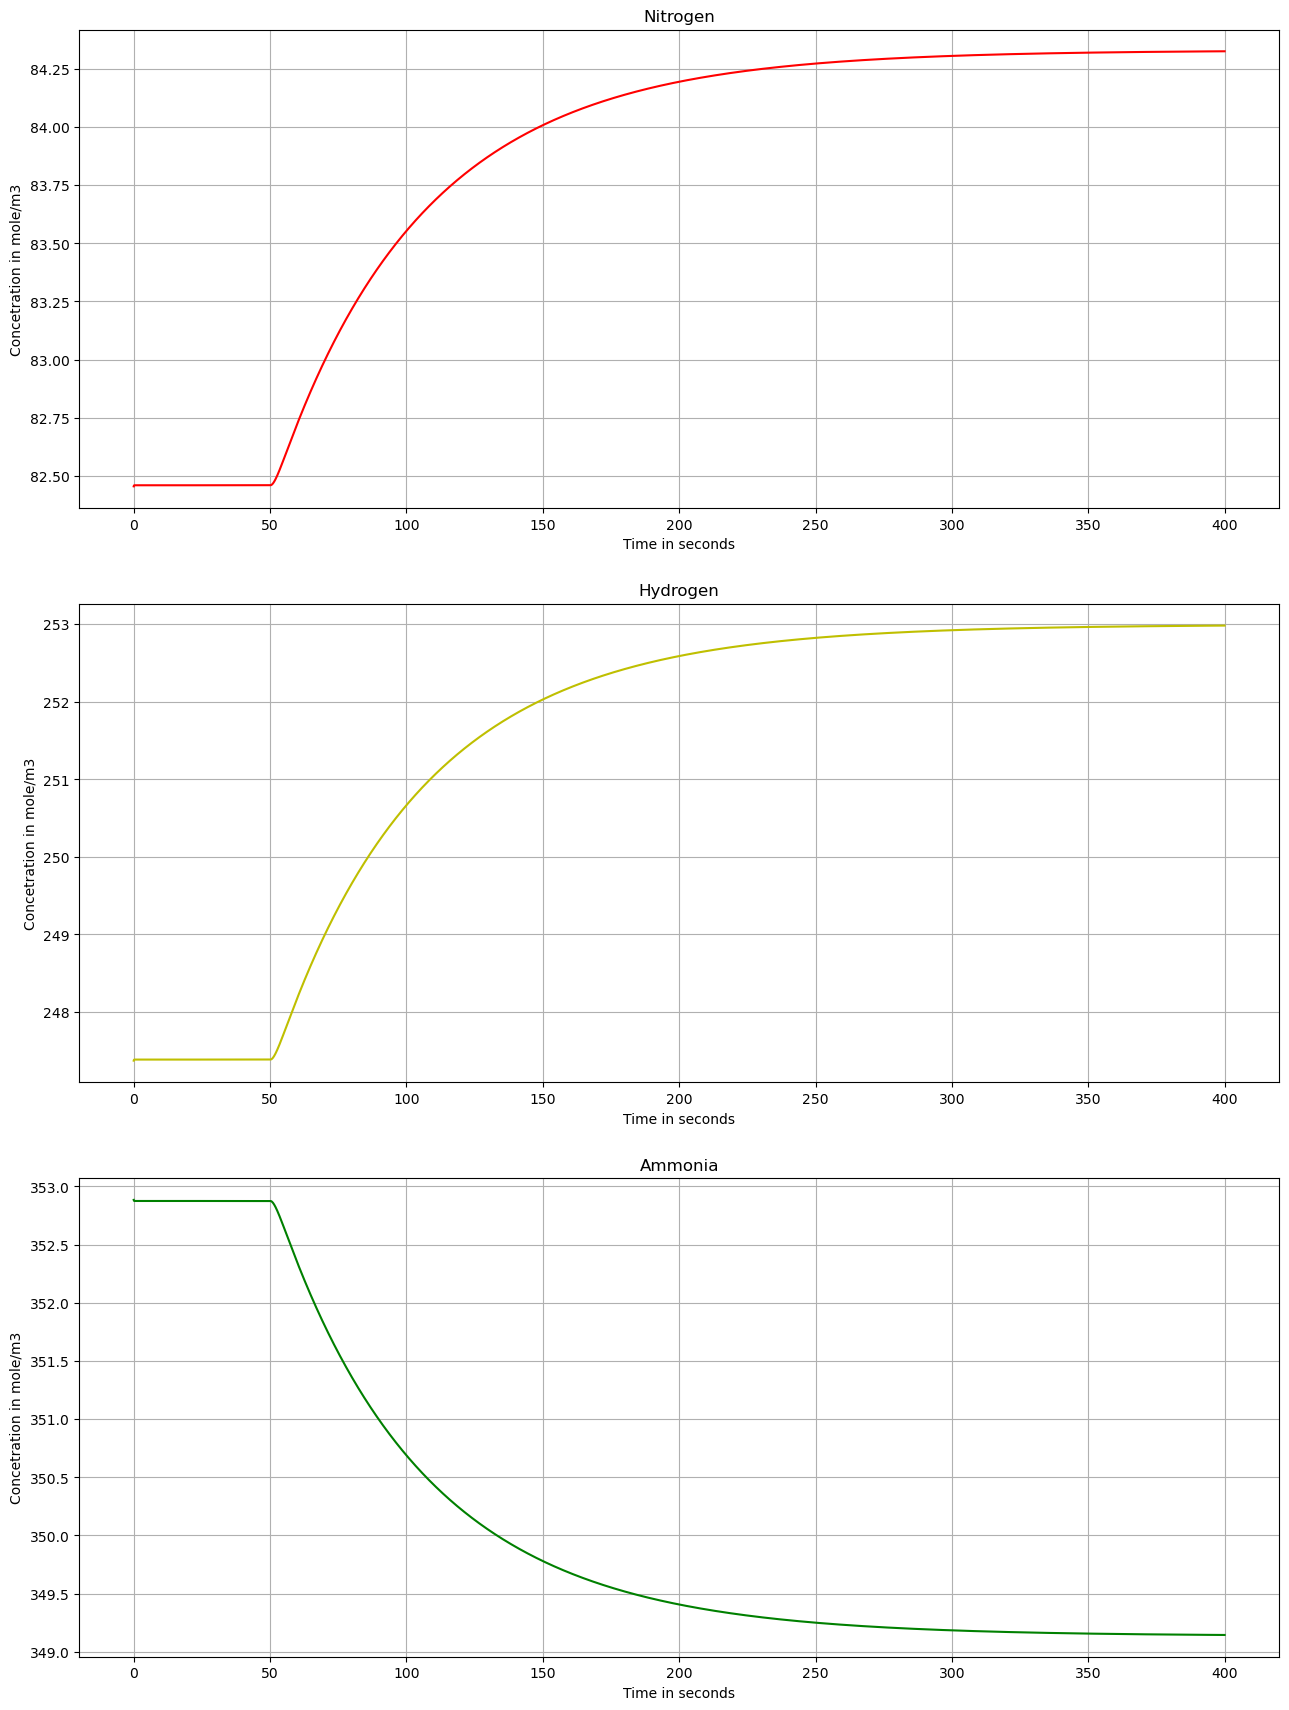

In [17]:
plt.subplot(3,1,1)

plt.plot(time,N2_array,'r')
plt.title('Nitrogen')
plt.xlabel('Time in seconds')
plt.ylabel('Concetration in mole/m3')
plt.subplots_adjust(right=2)
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(time,H2_array,'y')
plt.title('Hydrogen')
plt.xlabel('Time in seconds')
plt.ylabel('Concetration in mole/m3')
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=3.5)
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(time,NH3_array,'g')
plt.title('Ammonia')
plt.xlabel('Time in seconds')
plt.ylabel('Concetration in mole/m3')
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=3.5)
plt.grid(True)


plt.show()

The code below will calculate the final steady state values

In [18]:
def flow(t):
    count=-1
    for i in time:
        if i<=t:
            count=count+1
    return Flows[count]  

def FinalSteady(var):
    C_N2,C_H2,C_NH3=var
    dC_N2dt=flow(t_end)/V*(C_N2_in-C_N2)-k*C_N2*C_H2**3
    dC_H2dt=flow(t_end)/V*(C_H2_in-C_H2)-3*k*C_N2*C_H2**3
    dC_NH3dt=flow(t_end)/V*(C_NH3_in-C_NH3)+2*k*C_N2*C_H2**3
    
    return dC_N2dt,dC_H2dt,dC_NH3dt

C_N2_f,C_H2_f,C_NH3_f=fsolve(FinalSteady,[C_N2_in,C_H2_in,C_H2_in])    
print('Below are the final steady state concentrations after the step change.')
print()
print('C_N2_final  = {} mole/m3'.format(C_N2_f))
print('C_H2_final  = {} mole/m3'.format(C_H2_f))
print('C_NH3_final = {} mole/m3'.format(C_NH3_f))


Below are the final steady state concentrations after the step change.

C_N2_final  = 84.3252161322047 mole/m3
C_H2_final  = 252.98120395216958 mole/m3
C_NH3_final = 349.1448058308287 mole/m3


Run the cells below to compare Eulers method with Solve IVP. The graphs must fit on top of each other.

In [19]:
def checker2(t,var):
    C_N2,C_H2,C_NH3=var
    dC_N2dt=flow(t)/V*(C_N2_in-C_N2)-k*C_N2*C_H2**3
    dC_H2dt=flow(t)/V*(C_H2_in-C_H2)-3*k*C_N2*C_H2**3
    dC_NH3dt=flow(t)/V*(C_NH3_in-C_NH3)+2*k*C_N2*C_H2**3
    
    
    return dC_N2dt,dC_H2dt,dC_NH3dt

t_span=(0,t_end)
solution = solve_ivp(checker2, t_span, [C_N2_0,C_H2_0,C_NH3_0],  method='BDF', dense_output=True)
sol = solution.sol(time)

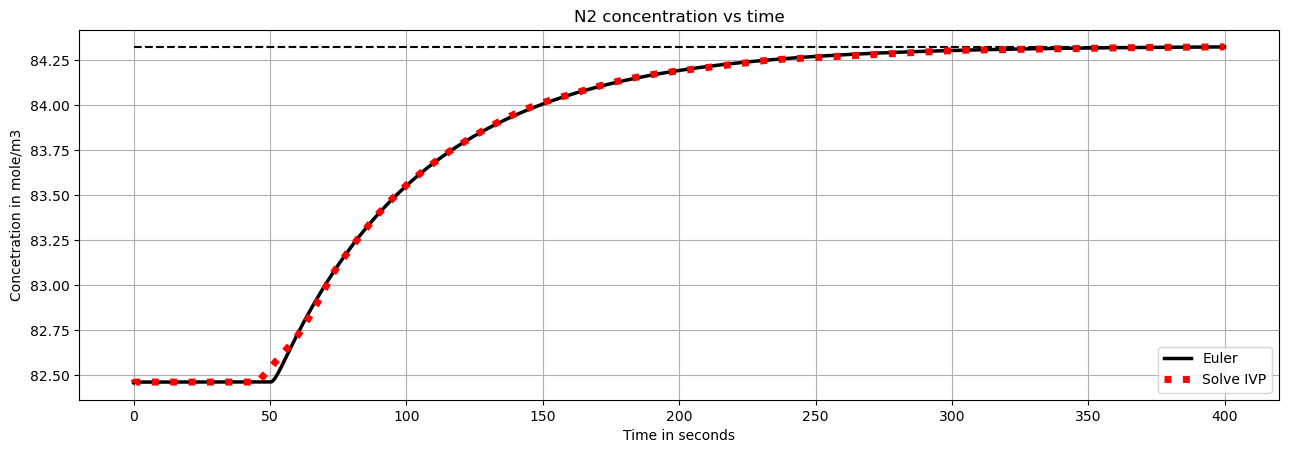

In [20]:
#Check N2
plt.plot(time,N2_array,'k',label='Euler',linewidth=2.5)
plt.plot([0,t_end],[C_N2_f,C_N2_f],'k--')
plt.plot(time,sol[0],'r:',label='Solve IVP',linewidth=5)
plt.xlabel('Time in seconds')
plt.ylabel('Concetration in mole/m3')
plt.title('N2 concentration vs time')
plt.legend(loc='best')
plt.subplots_adjust(right=2)
plt.grid(True)
plt.show()

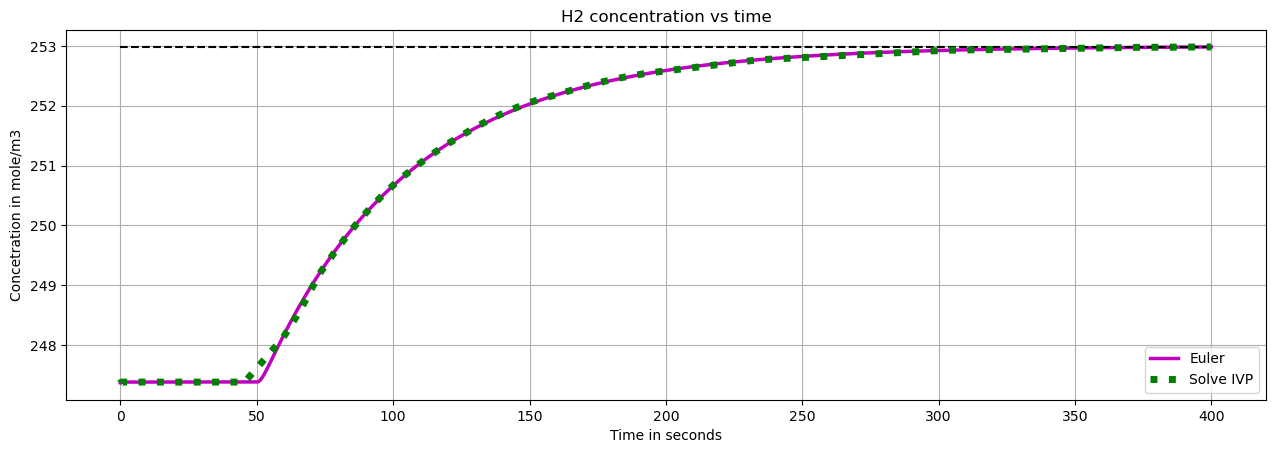

In [21]:
#Check H2
plt.plot(time,H2_array,'m',label='Euler',linewidth=2.5)
plt.plot([0,t_end],[C_H2_f,C_H2_f],'k--')
plt.plot(time,sol[1],'g:',label='Solve IVP',linewidth=5)
plt.xlabel('Time in seconds')
plt.ylabel('Concetration in mole/m3')
plt.title('H2 concentration vs time')
plt.legend(loc='best')
plt.subplots_adjust(right=2)
plt.grid(True)
plt.show()

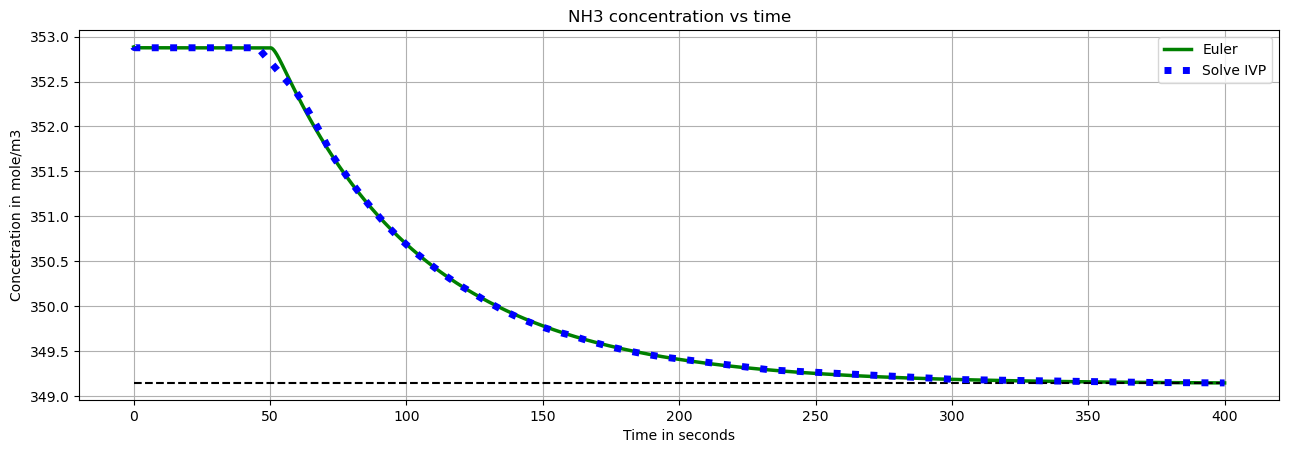

In [22]:
#Check NH3
plt.plot(time,NH3_array,'g',label='Euler',linewidth=2.5)
plt.plot([0,t_end],[C_NH3_f,C_NH3_f],'k--')
plt.plot(time,sol[2],'b:',linewidth=5,label='Solve IVP')
plt.xlabel('Time in seconds')
plt.ylabel('Concetration in mole/m3')
plt.title('NH3 concentration vs time')
plt.legend(loc='best')
plt.subplots_adjust(right=2)
plt.grid(True)
plt.show()

## Task 7 work

In [23]:
def FOPDT(t, Kp, tau, theta):
    C_vals = []
    for i in t:
        if i<=theta:
            C_vals.append(Cs)
        if i>theta:
            C = Kp*M*(1-np.exp(-(i-theta)/tau)) + Cs
            C_vals.append(C)
    return np.array(C_vals)

In [24]:
Cs = NH3_array[0]
M = 2
Kp_guess = (NH3_array[-1] - Cs)/M
tau_guess = 80     #Calculated by finding the time at which the concentration = Cs + 0.63*delta
theta_guess = 50

In [32]:
params,_ = curve_fit(FOPDT,time,NH3_array,p0=[Kp_guess, tau_guess, theta_guess])

-1.8709194280604295


In [27]:
FOPDT_flows = FOPDT(time, params[0], params[1], params[2])

[]

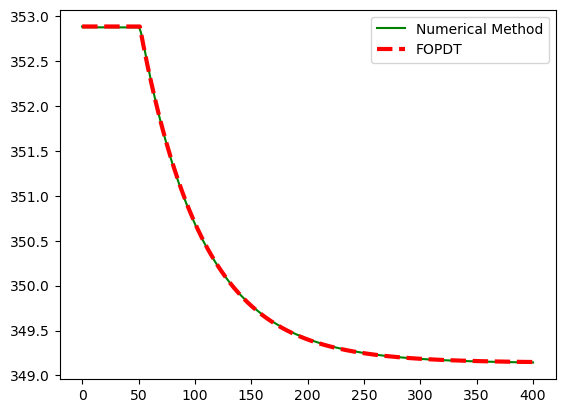

In [28]:
plt.plot(time,NH3_array,'g',label='Numerical Method')
plt.plot(time,FOPDT_flows,'r--',label='FOPDT',linewidth=3)
plt.legend(loc='best')
plt.plot()